# Purpose

This is a simulation model for simulating profits for a manufacturing company.<br>
<br>
The first part walks through a single simulation for modeling profits.<br>
The next part simulates one million trials and assesses the distribution of profits.<br>
After that there is a risk assessment.<br>
Finally, there is a confidence interval for the population of mean profits<br>
and a standard deviation assessment of the range of values profits is likely to take on.

In [2]:
# random number generation libraries
import random
from random import randrange

# the standard data manipulation libraries
import numpy as np
import pandas as pd

# statistical libraries
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names

# visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Some regional settings for this notebook
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Simulation for Profit Model Walkthrough

## Data: Random and Known

### Single Simulation

In [3]:
# Some regional settings for this notebook
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

########################### Variable Cost #####################################

print('          Variable Cost')
# Unit cost is randomly between $22.00 to $26.00
ll = 22
ul = 26
uc = random.randint(ll,ul) + random.random()
print('Unit Cost:', uc)


# Quantitiy Produced - management determines how much to produce
qp = 40000
print('Quantity Produced:', qp)


# Variable Cost = Quantity Produced * Unit Cost
# vc = qp * uc
vc = qp * uc
print('Variable Cost:', vc)

##################################################################
print('')

############################ Demand & Quantity Sold #########################
print('          Quantity Sold')
# Demand follows the descrete cumulative distribution
list2 = [40000, 45000, 50000, 55000, 60000]

d = random.choices(list2, cum_weights=(0.1, 0.4, 0.8, 0.95, 1), k=1)
d = d.pop(0) # this has to be done to remove demand from a list type so it can be used with the min() function
print('Demand:', d)
print('Quantity Produced:', qp)


# Quantity Sold is the minmum of Quantity Produced and Demand
list3 = [qp, d]
qs = min(qp, d)
print('Quantity Sold:', qs)
print('')
###################################### Revenue #################################
# Unit Price is a known value 
up = 40.00
print('Unit Price:', up)
print('Quantity Sold:', qs)
print('')

print('          Revenue')
# Revenue = Unit Price * Quantity Sold
r = up*qs
print('Revenue:', r)
print('')



#################################################################################

############################ Profits #########################################
print('          Profits')
# Fixed cost follows the triangle distribution
a = 350000
b = 500000
c = 400000
fc = random.triangular(a, b, c)
print('Fixed Cost:', fc)

# Profits = Revenues - Fixed Cost - Variable Cost
p = r - fc -vc

print('Variable Cost:', vc)
print('Profits:', p)


          Variable Cost
Unit Cost: 25.028957457909627
Quantity Produced: 40000
Variable Cost: 1001158.298316385

          Quantity Sold
Demand: 40000
Quantity Produced: 40000
Quantity Sold: 40000

Unit Price: 40.0
Quantity Sold: 40000

          Revenue
Revenue: 1600000.0

          Profits
Fixed Cost: 372310.4382455328
Variable Cost: 1001158.298316385
Profits: 226531.26343808218


# Simulation: 1,000,000 trials

          profits
count 1000000.000
mean   203326.099
std     65600.015
min     21926.853
25%    153117.978
50%    203308.147
75%    254189.199
max    368479.295


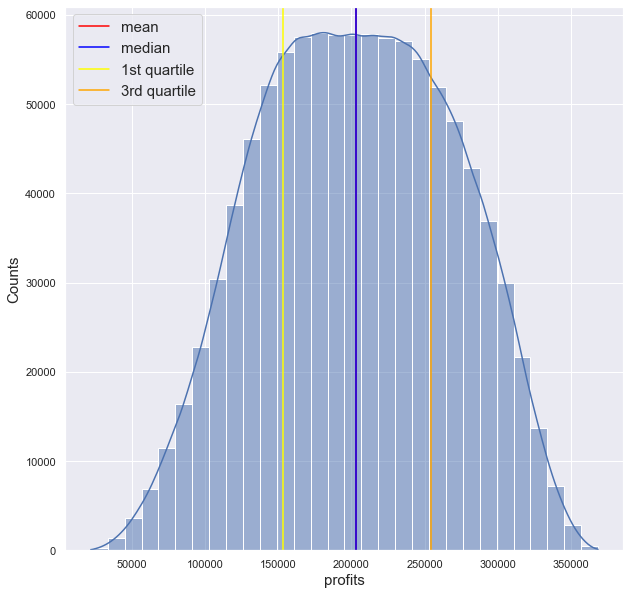

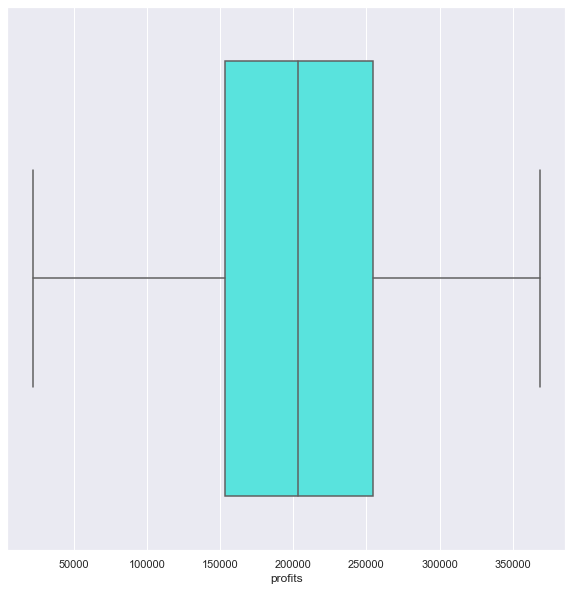

In [4]:
simulations = 1000000
counter = simulations
profit = []

while counter > 0:
    # Unit cost is randomly between $22.00 to $26.00
    ll = 22
    ul = 26
    uc = random.randint(ll,ul) + random.random()
    
    # Quantity Produced - management determines how much to produce
    qp = 40000
    # Variable Cost = Quantity Produced * Unit Cost
    # vc = qp * uc
    vc = qp * uc
    
    # Demand follows the discrete cumulative distribution
    list2 = [40000, 45000, 50000, 55000, 60000]
    d = random.choices(list2, cum_weights=(0.1, 0.4, 0.8, 0.95, 1), k=1)
    d = d.pop(0)
    
    # Quantity Sold is the minimum of Quantity Produced and Demand
    list3 = [qp, d]
    qs = min(qp, d)
    
    # Unit Price is a known value 
    up = 40.00
    
    # Revenue = Unit Price * Quantity Sold
    r = up*qs
    
    # Fixed cost follows the triangle distribution
    a = 350000
    b = 500000
    c = 400000
    fc = random.triangular(a, b, c)
    
    # Profits = Revenues - Fixed Cost - Variable Cost
    p = r - fc -vc
    
    profit.append(p)
    counter = counter - 1

df1 = pd.DataFrame(profit)
df1.columns = ['profits']
print(df1.describe())

x1 = df1['profits']


#################### Visualization ############################

plt.figure(figsize=(10,10))
sns.histplot(df1, x='profits', bins= 30,  kde = True)

mean = x1.mean()
median = x1.median()
qtr1 = np.percentile(x1, 25)
qtr3 = np.percentile(x1,75)
plt.axvline(mean, 0,1, color = 'red', label='mean')
plt.axvline(median, 0,1, color = 'blue', label='median')
plt.axvline(qtr1, 0,1, color ='yellow', label='1st quartile')
plt.axvline(qtr3, 0,1, color ='orange', label='3rd quartile')

plt.xlabel('profits', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(loc='upper left', fontsize=15)

plt.show()

plt.figure(figsize=(10,10))
ax = sns.boxplot(x='profits', data=df1, color = '#42FAF2')


# Fitting the Simulation Results to a Distribution

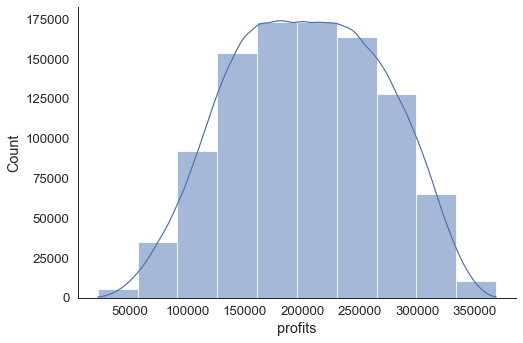

Different Distributions: ['_fit', 'alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'genhyperbolic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gibrat', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh',

,sumsquare_error,aic,bic,kl_div
gamma,0.000,2642.532,-38090750.450,0.023
norm,0.000,2640.132,-38086890.637,0.023
burr,inf,inf,inf,inf
beta,inf,inf,inf,inf


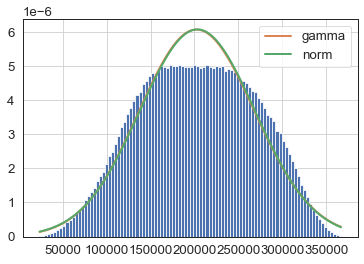

In [5]:
# Libraries to import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

# assign a new dataframe to = the results from above
dataset = df1.copy()

# select column in dataset to model
data1 = dataset['profits']
data2 = dataset['profits'].values


# Histogram settings
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.displot(data= dataset, x= data1, kind= 'hist', bins = 10, kde= True, aspect = 1.5)
plt.show()


# select distributions to model fit
print('Different Distributions:', get_distributions())
f = Fitter(data2, distributions=['gamma', 'beta', 'burr', 'norm'])
f.fit()
f.summary()

# Risk Assessment

In [8]:
# Double check the data is present in the dataframe
df1.head()

,profits
0,200441.596
1,246388.572
2,276709.486
3,129896.265
4,124588.065


In [9]:
df2 = df1.copy()
df2.head()

,profits
0,200441.596
1,246388.572
2,276709.486
3,129896.265
4,124588.065


In [10]:

# The lowest acceptable profit level
# The profit cut off level selected is:
cutoff = 125000

# Binning into binary values based off conditions:
df2.loc[df2.profits < cutoff, 'profits'] = 0
df2.loc[df2.profits >= cutoff, 'profits'] = 1

# Grouping and counting
df2.groupby('profits').agg({'profits':[('counts', 'count')]})

df3 = df2.copy()
df3


,profits
0,1.000
1,1.000
2,1.000
3,1.000
4,0.000
...,...
999995,1.000
999996,1.000
999997,1.000
999998,1.000


In [11]:
# Since 1 = above profit cut off, the sum here is a
# count of every occurance above the profit cut off

df3.columns = ['counts']
favorable = df3['counts'].sum()
risksum = simulations - favorable

print('The count of values above $', cutoff, 'in profit is', favorable, 'out of', simulations)
print('')
print('The count of values below $', cutoff, 'in profit is', risksum, 'out of', simulations)
print('')
print('The simulated outcome of profits being above $', cutoff, 'is', round(favorable/simulations*100, 2), '%')
print('')
print('The simulated outcome of profits being below $', cutoff, 'is', round(risksum/simulations*100, 2),'%')

The count of values above $ 125000 in profit is 871269.0 out of 1000000

The count of values below $ 125000 in profit is 128731.0 out of 1000000

The simulated outcome of profits being above $ 125000 is 87.13 %

The simulated outcome of profits being below $ 125000 is 12.87 %


# Confidence Interval for the Population Mean Profit

In [13]:
st.t.interval(confidence= .99, loc=df1['profits'].mean(), df=499999)

(203323.52323780535, 203328.67491607874)

In [14]:
print(df1.describe())

          profits
count 1000000.000
mean   203326.099
std     65600.015
min     21926.853
25%    153117.978
50%    203308.147
75%    254189.199
max    368479.295


# Mean +- 1 Standard Deviation

In [15]:
mean = df1['profits'].mean()
sd = df1['profits'].std()

print('the mean + 1 SD =', mean+sd)
print('the mean - 1 SD =', mean-sd)

the mean + 1 SD = 268926.11429261614
the mean - 1 SD = 137726.08386126798


# Conclusion

The risk assessment shows that profits are 87% likely to be above $125,000.<br>
The values profts might take one within +-1 standard deviation  from the population mean are between 137,726 and 268,926 dollars